In [1]:
import base64
from io import BytesIO
import json
from PIL import Image
# pip3 install pillow
import requests
from IPython.display import display
# 若img.save()报错 cannot write mode RGBA as JPEG
# 则img = Image.open(image_path).convert('RGB')
def image_to_base64(image_path):
    img = Image.open(image_path)
    output_buffer = BytesIO()
    img.save(output_buffer, format='JPEG')
    byte_data = output_buffer.getvalue()
    base64_str = base64.b64encode(byte_data)
    return base64_str


###############################################
# 影像路徑位置
img = "img2.jpeg"



# 整理要傳送的資料
dic = {}
data_dic = {}
dic["id"] = ["1"]
data_dic["prompt"] ="This is a photo of the room layout, with the premise of not changing the furniture layout, changing its style to Red major."
data_dic["inf_times"] = 30 # 最高到 50
data_dic["img"] =  image_to_base64(img).decode('utf-8')
dic["data"] = data_dic


# 寫檔
with open('Req_data.json', 'w') as fp:
    json.dump(dic, fp)


# 打包傳送資料，並且送出請求
json_data_trans = json.dumps(dic)
res_trs = requests.request("POST", url = "http://163.17.136.69:6666/TransformsAPI", data = json_data_trans)

print(res_trs)
results = res_trs.json()

<Response [200]>


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1536x1024 at 0x7F974AFA33A0>


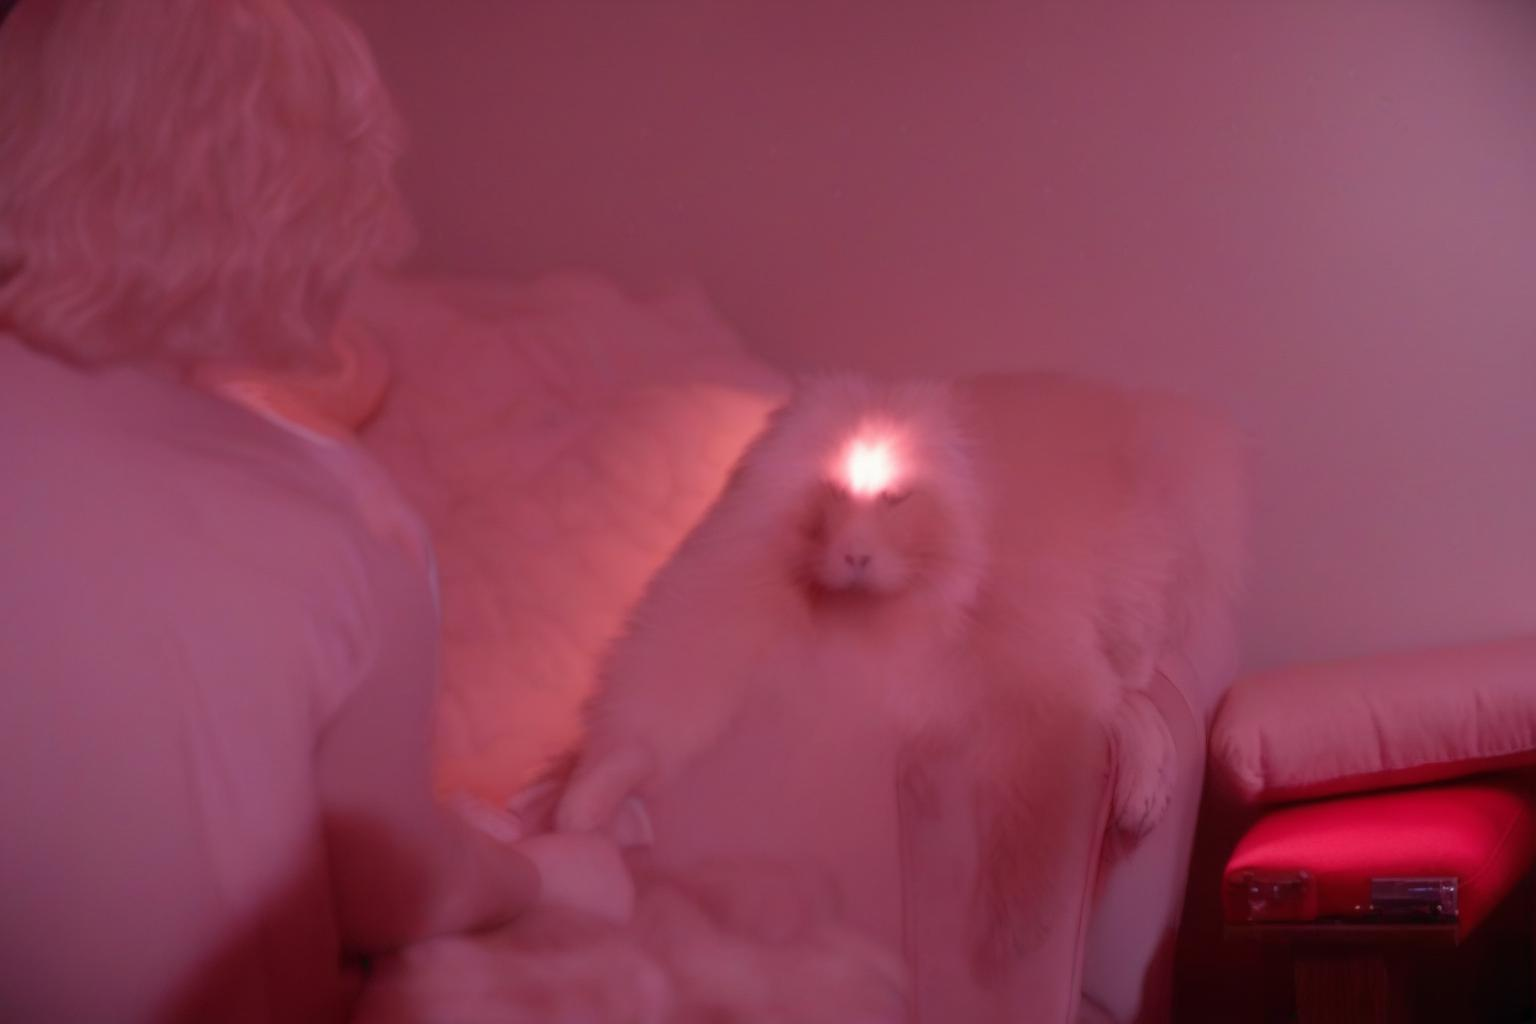

In [3]:

# Convert Base64 to Image
def base64_2_img(data):
    buff = BytesIO(base64.b64decode(data))
    return Image.open(buff)



new_img = base64_2_img(results["data"]["Image_results"])
print(new_img)
display(new_img)